# Set up

In [23]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib notebook

# XTRUE.M

In [24]:
def x_true(F, G, H, Q, R, x0, t_steps):
    '''
    % A function to compute true state-space history
    % and true observations from a discrete-time
    % model with no input. For use with a Kalman Filter
    %
    % Inputs: F   Xsize*Xsize state transition matrix
    %         G   Xsize*Vsize state noise transition matrix
    %         H   Zsize*Xsize observation matrix
    %         Q   Vsize*Vsize process noise covariance matrix
    %         R   Zsize*Zsize observation noise covariance matrix
    %         x0  Xsize*1 initial state vector 
    %         t_steps, number of time-steps to be simulated
    %
    % Outputs: z  Zsize*t_steps Observation time history
    %          x  Xsize*t_steps true state time history
    ''' 
    # First check all matrix dimensions
    [Rows,Cols] = F.shape
    if Rows != Cols: raise Exception('F is non-square')
        
    [Xsize,nul]=x0.shape
    if Xsize != Rows: raise Exception('x0 does not match dimension of F')
        
    [Rows,Vsize]=G.shape
    if Xsize != Rows: raise Exception('G does not match dimension of F')
        
    [Rows,Cols]=Q.shape
    if Rows != Cols: raise Exception('Q must be square')
        
    if Vsize != Rows: raise Exception('Q does not match dimension of G')
        
    [Zsize,Cols]=H.shape
    if Cols != Xsize: raise Exception('H and Xsize do not match')
        
    [Rows,Cols]=R.shape
    if Rows != Cols: raise Exception('R must be square')
        
    if Rows != Zsize: raise Exception('R must match Zsize of H')
        
   # fix up output matricies
    x = np.zeros((Xsize, t_steps+1))
    z = np.zeros((Zsize, t_steps+1))
    
    # get some gaussian noise - rand('normal')
    v = math.sqrt(Q) * np.random.randn(Vsize, t_steps+1)
    w = math.sqrt(R) * np.random.randn(Zsize, t_steps+1)
    
    # initial value
    x0 = x[:,0].reshape(2,1)
    
    # now generate all the remaining states
    for i in range(t_steps):
        x[:, i+1] = np.dot(F, x[:,i]) + np.dot(G, v[:,i])
        
    # then all the observations
    for i in range(1, t_steps+1):
        z[:, i] = np.dot(H, x[:,i]) + w[:, i]
        
    return z, x

# run_sim.m

In [25]:
# continuous time state transition matrix
A = np.array([[0, 1]
            , [0, 0]])

In [26]:
# continuous time input model
B = np.array([[0]
            , [1]])

In [27]:
# observation model
H = np.array([[1, 0]])

In [28]:
# continuous time noise variance, must be square
Q = np.array([[0.01]]) 

In [29]:
# observation noise variance, must be square
R = np.array([[1]])

In [30]:
# initial conditions
x0 = np.array([[0]
            ,[0]])

In [31]:
# sample period
dt = 1.0

In [32]:
# number of time-steps to simulate
t_steps = 500

In [33]:
time = range(t_steps+1)

In [34]:
#Transform a continuous to a discrete state-space system.
F = np.array([[1, dt]
            , [0, 1]])

G = np.array([[dt**2/2]
            , [dt]])

<div class="alert alert-block alert-warning">
<b>Note from Hugh:</b> For this problem, just replace c2d with direct digital results: F=[1,dt; 0, 1], G=[dt^2/2; dt] (this is what you get if you integrate A=[0, 1; 0, 0] and B=[1, 0] over the time interval dt.).
</div>

In [40]:
# Run simulation
z, x = x_true(F, G, H, Q, R, x0, t_steps)

# rplots.m

<IPython.core.display.Javascript object>


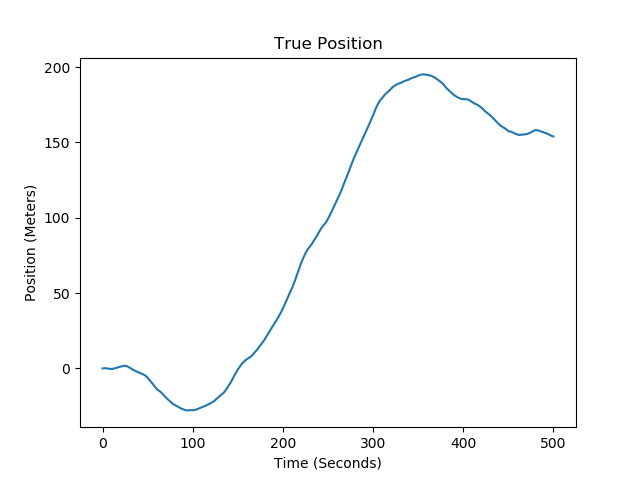

Text(0.5, 1.0, 'True Position')

In [41]:
#Figure 1
plt.figure()
plt.plot(time, x[0,:])

# Set label axis
plt.xlabel('Time (Seconds)')
plt.ylabel('Position (Meters)')
plt.title('True Position')

<IPython.core.display.Javascript object>


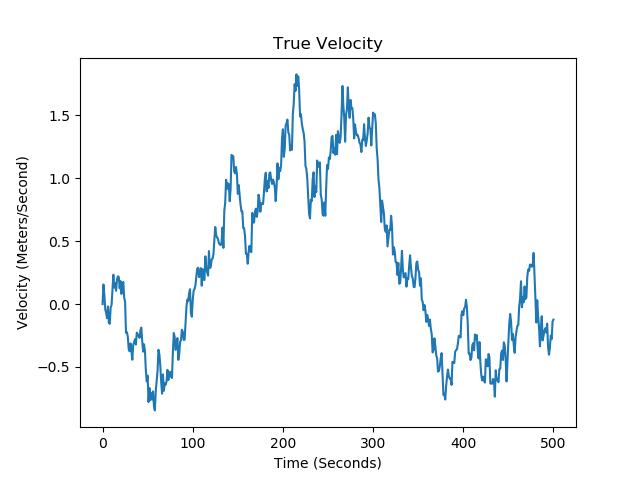

Text(0.5, 1.0, 'True Velocity')

In [42]:
#Figure 2
plt.figure()
plt.plot(time, x[1,:])

# Set label axis
plt.xlabel('Time (Seconds)')
plt.ylabel('Velocity (Meters/Second)')
plt.title('True Velocity')

<IPython.core.display.Javascript object>


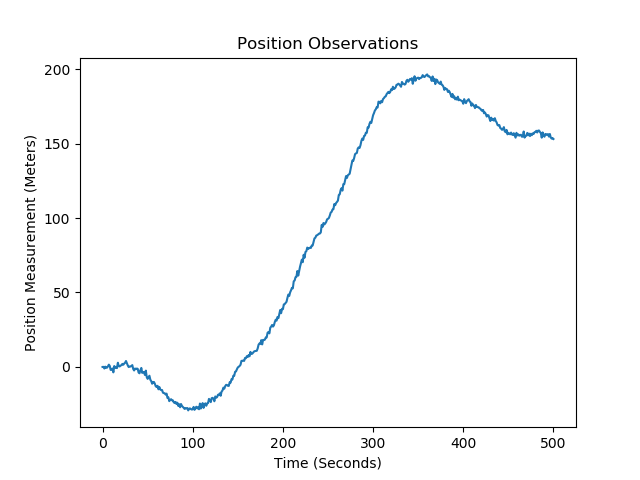

Text(0.5, 1.0, 'Position Observations')

In [43]:
#Figure 3
plt.figure()
plt.plot(time, z[0,:])

# Set label axis
plt.xlabel('Time (Seconds)')
plt.ylabel('Position Measurement (Meters)')
plt.title('Position Observations')

<IPython.core.display.Javascript object>


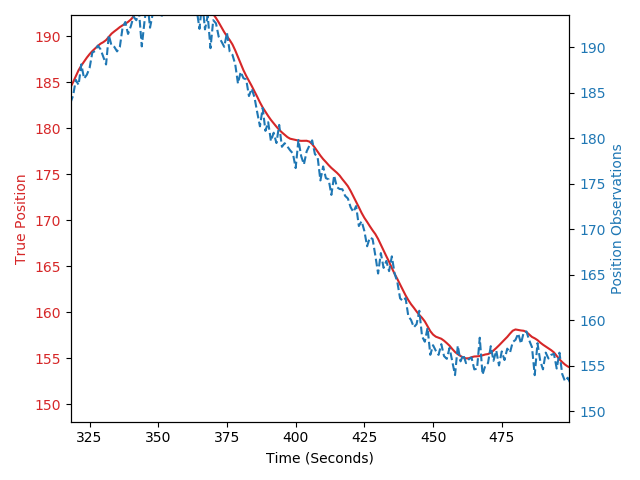

In [44]:
# Check true target track and position observations
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Time (Seconds)')
ax1.set_ylabel('True Position', color=color)
ax1.plot(time, x[0,:], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Position Observations', color=color)  
ax2.plot(time, z[0,:], color=color, linestyle = '--')
ax2.tick_params(axis='y', labelcolor=color)
    
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()